In [1]:
%matplotlib notebook

In [45]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [3]:
def readfile(path):
    def func():
        with open(path) as f:
            for line in f:
                line = line.rstrip()
                parts = line.split(',')
                ex = {}
                ex['rank'] = int(parts[0])
                ex['token'] = parts[1]
                ex['count'] = int(parts[2])
                ex['isreserved'] = int(parts[3]) == 1
                ex['tfidf'] = list(map(float,parts[4:]))
                yield ex
    return list(func())

100


<IPython.core.display.Javascript object>


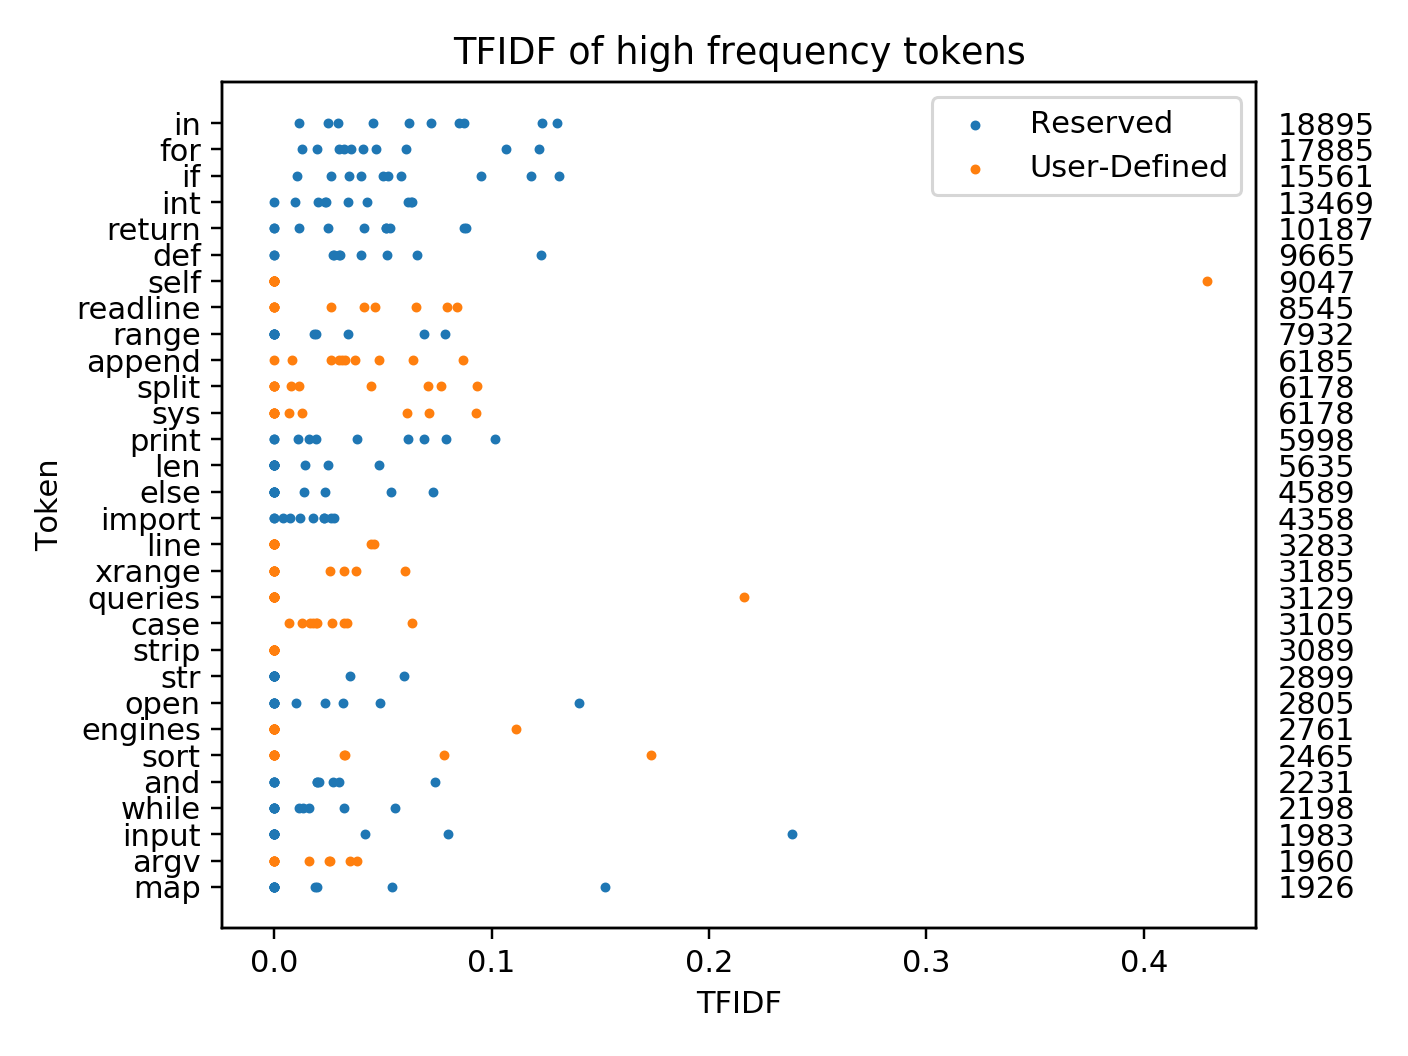

In [11]:

path = './notebook-data/ranked-tfidf.txt'
records = readfile(path)
print(len(records))

toshow = 30

records = records[:toshow]

fig, ax = plt.subplots()

data = {}
data['reserved'] = {}
data['reserved']['xs'] = []
data['reserved']['ys'] = []
data['unreserved'] = {}
data['unreserved']['xs'] = []
data['unreserved']['ys'] = []

for i, ex in enumerate(records):
    for val in ex['tfidf']:
        if ex['isreserved']:
            data['reserved']['xs'].append(val)
            data['reserved']['ys'].append(-(i+1))
        else:
            data['unreserved']['xs'].append(val)
            data['unreserved']['ys'].append(-(i+1))

labels = ['{}'.format(ex['token']) for ex in records]
counts = ['{}'.format(ex['count']) for ex in records]
        
ax.set_yticklabels(labels)
ax.set_yticks(-(np.arange(toshow)+1))

s = 5
ax.scatter(data['reserved']['xs'], data['reserved']['ys'], s=s, label='Reserved')
ax.scatter(data['unreserved']['xs'], data['unreserved']['ys'], s=s, label='User-Defined')

ax_right = ax.twinx()
ax_right.set_yticklabels(counts)
ax_right.set_yticks(-(np.arange(0, toshow)+1))
ax_right.yaxis.set_ticks_position('none') 

# Needed for axis.
ax_right.scatter(data['reserved']['xs'], data['reserved']['ys'], s=s, alpha=0)
ax_right.scatter(data['unreserved']['xs'], data['unreserved']['ys'], s=s, alpha=0)


plt.title('TFIDF of high frequency tokens')
ax.set_ylabel('Token')
ax.set_xlabel('TFIDF')

ax.legend(loc='best')

plt.tight_layout()
        
plt.show()
    

100


<IPython.core.display.Javascript object>


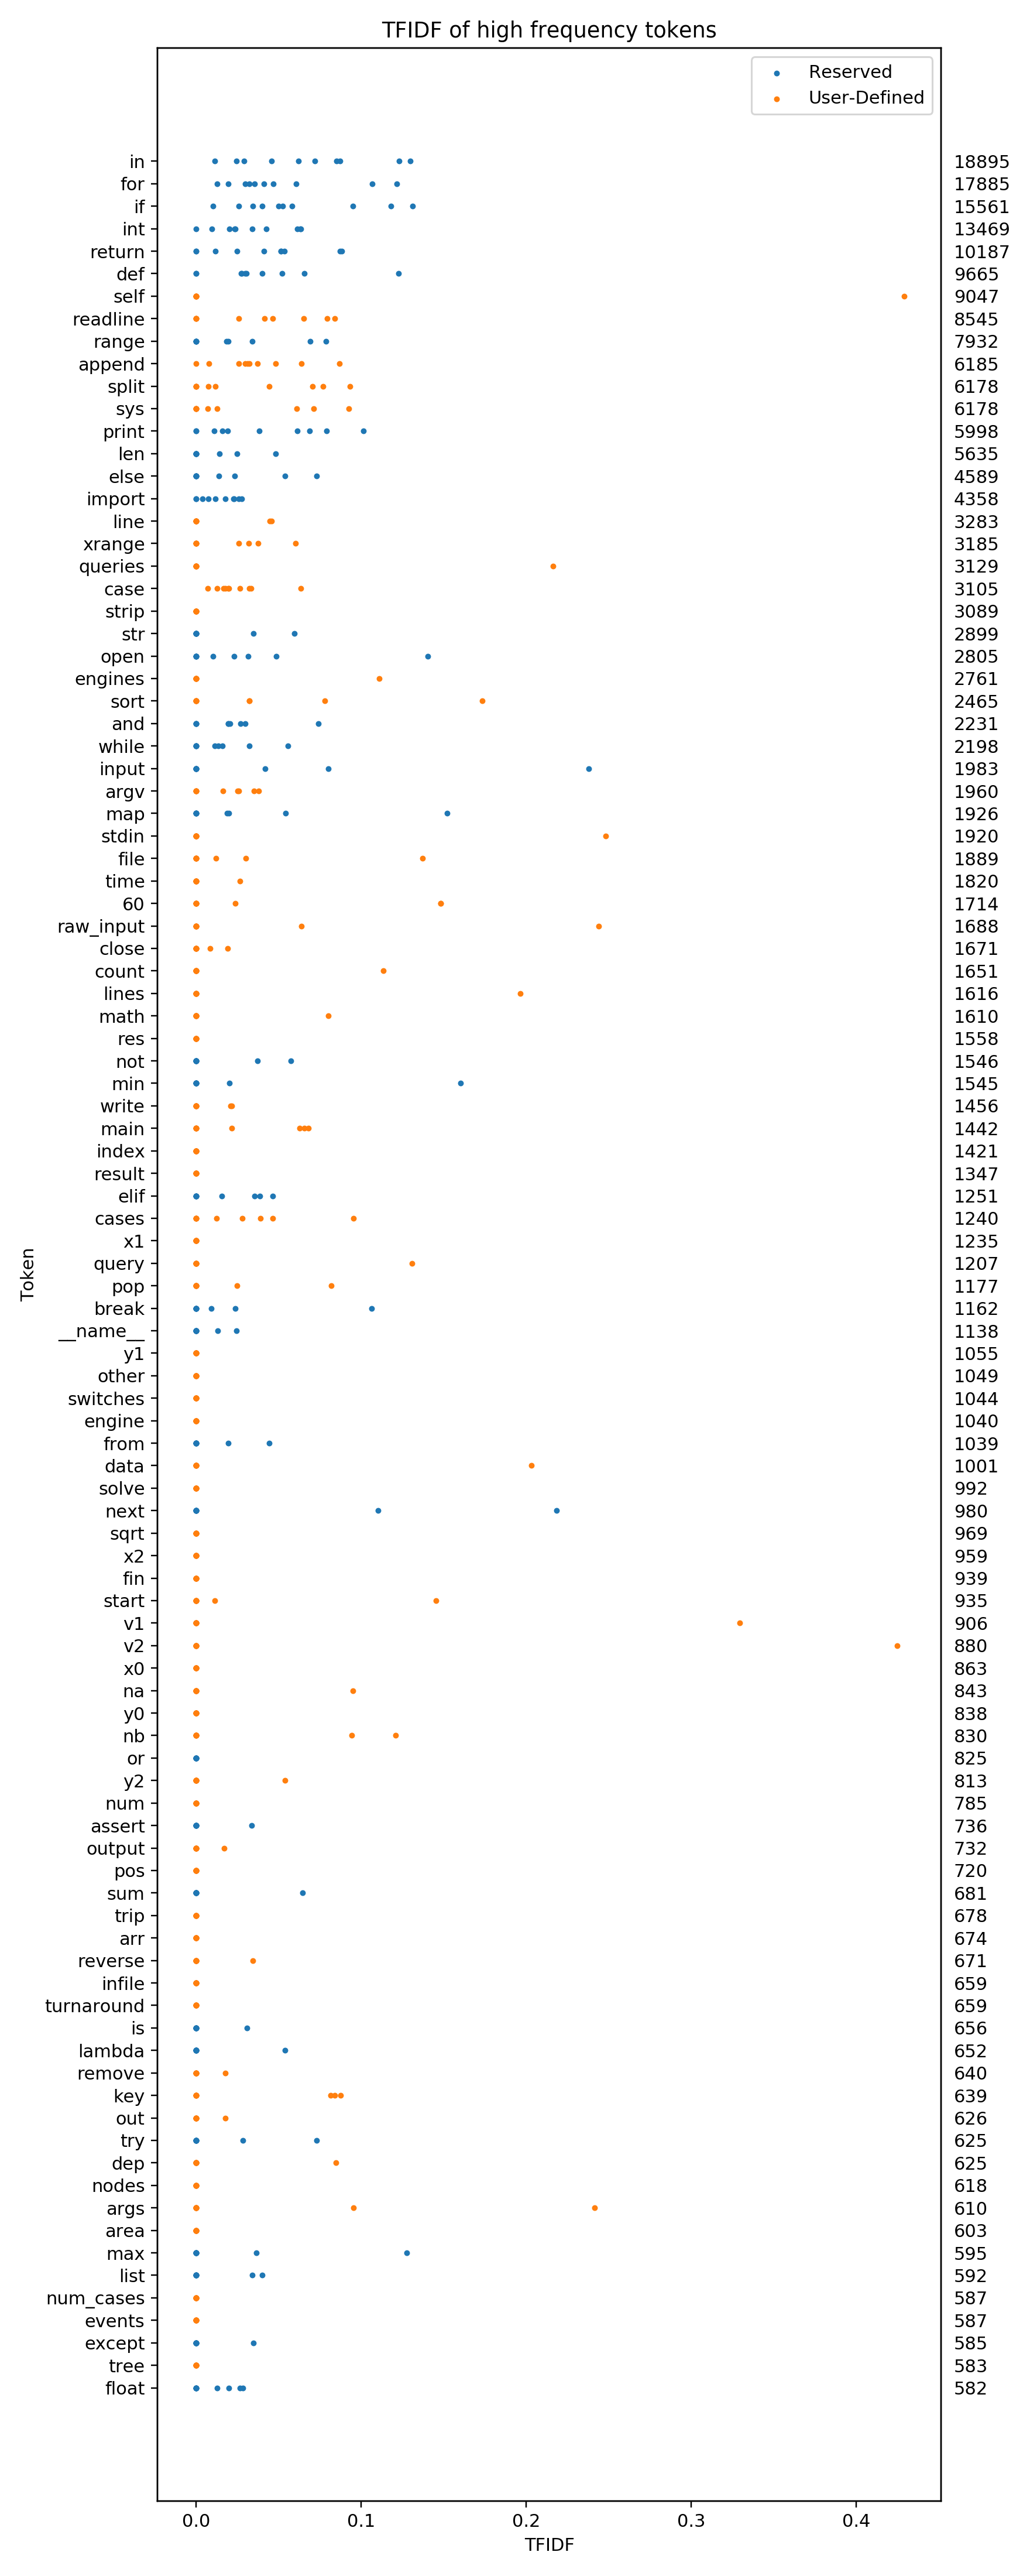

In [12]:

path = './notebook-data/ranked-tfidf.txt'
records = readfile(path)
print(len(records))

toshow = 100

records = records[:toshow]

fig, ax = plt.subplots(figsize=(8, 20))

data = {}
data['reserved'] = {}
data['reserved']['xs'] = []
data['reserved']['ys'] = []
data['unreserved'] = {}
data['unreserved']['xs'] = []
data['unreserved']['ys'] = []

for i, ex in enumerate(records):
    for val in ex['tfidf']:
        if ex['isreserved']:
            data['reserved']['xs'].append(val)
            data['reserved']['ys'].append(-(i+1))
        else:
            data['unreserved']['xs'].append(val)
            data['unreserved']['ys'].append(-(i+1))

labels = ['{}'.format(ex['token']) for ex in records]
counts = ['{}'.format(ex['count']) for ex in records]
        
ax.set_yticklabels(labels)
ax.set_yticks(-(np.arange(toshow)+1))

s = 5
ax.scatter(data['reserved']['xs'], data['reserved']['ys'], s=s, label='Reserved')
ax.scatter(data['unreserved']['xs'], data['unreserved']['ys'], s=s, label='User-Defined')

ax_right = ax.twinx()
ax_right.set_yticklabels(counts)
ax_right.set_yticks(-(np.arange(0, toshow)+1))
ax_right.yaxis.set_ticks_position('none') 

# Needed for axis.
ax_right.scatter(data['reserved']['xs'], data['reserved']['ys'], s=s, alpha=0)
ax_right.scatter(data['unreserved']['xs'], data['unreserved']['ys'], s=s, alpha=0)


plt.title('TFIDF of high frequency tokens')
ax.set_ylabel('Token')
ax.set_xlabel('TFIDF')

ax.legend(loc='best')

plt.tight_layout()
        
plt.show()
    

100


<IPython.core.display.Javascript object>


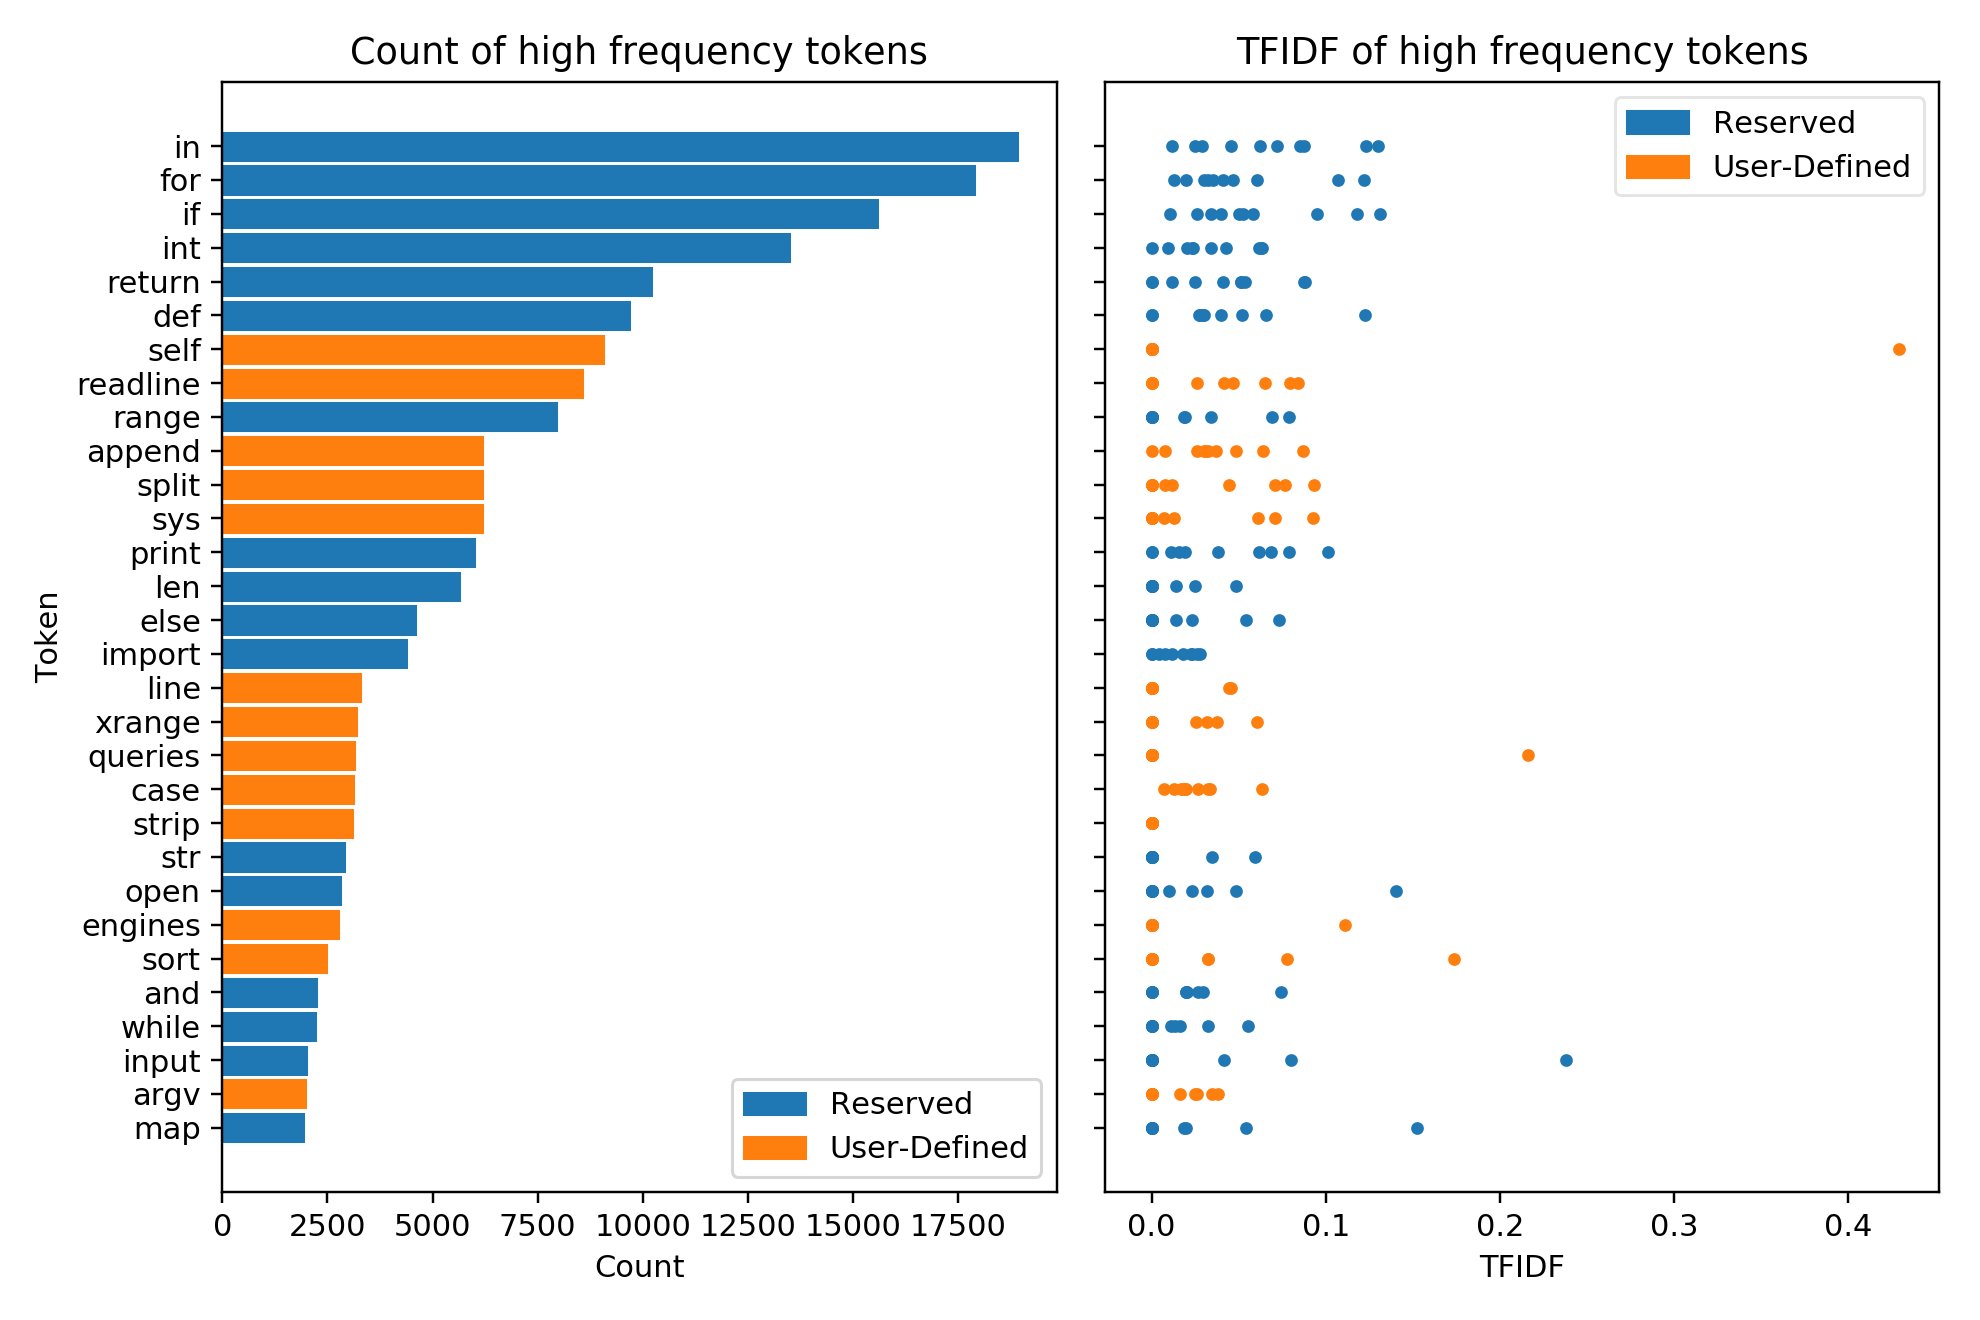

[0.07206602758493533, 0.12298480946551518, 0.029155144966686784, 0.04568073632862018, 0.02463172003193327, 0.06210393793103874, 0.08725099084530549, 0.011521939554112865, 0.12986838069235096, 0.08499712885640569, 0.06058130276789354, 0.03231197324317774, 0.03534622031126943, 0.02992345159133726, 0.12168964933160709, 0.012707886167070338, 0.04687926190231026, 0.1067552997456369, 0.0410579530117738, 0.01966719096788298, 0.11800141160063914, 0.034378231632284074, 0.04007450465662897, 0.026010935909080983, 0.05829935559550613, 0.09490322296869551, 0.05004140260711153, 0.13119220221448333, 0.052348651278981986, 0.010377222206384464, 0.06152073702680034, 0.0340598856891577, 0.04263239646048102, 0.06346955614728654, 0.023444790582334354, 0.020135348640010098, 0.02383883291397401, 0.0, 0.06295320351690509, 0.009697119945460934, 0.024813782553507056, 0.051287887088905255, 0.08820863950217593, 0.0, 0.011562779785235325, 0.04109605439579129, 0.08731306005081663, 0.05346044130931664, 0.05158653775

In [123]:

path = './notebook-data/ranked-tfidf.txt'
records = readfile(path)
print(len(records))

toshow = 30

records = records[:toshow]

fig, (ax, ax_right) = plt.subplots(figsize=(9,6), ncols=2, sharey=True)

data = {}
data['reserved'] = {}
data['reserved']['xs'] = []
data['reserved']['ys'] = []
data['udf'] = {}
data['udf']['xs'] = []
data['udf']['ys'] = []

labels = []
values = []
assignment = []
tfidf = []

for i, ex in enumerate(records):
    labels.append(ex['token'])
    values.append(ex['count'])
    assignment.append('reserved' if ex['isreserved'] else 'udf')

    for val in ex['tfidf']:
        if ex['isreserved']:
            data['reserved']['xs'].append(val)
            data['reserved']['ys'].append(i)
#             data['reserved']['ys'].append(-(i+1)) 
        else:
            data['udf']['xs'].append(val)
            data['udf']['ys'].append(i)
#             data['udf']['ys'].append(-(i+1))
#     if ex['isreserved']:
#         data['reserved']['labels'].append(ex['token'])
#         data['reserved']['values'].append(ex['count'])
#     else:
#         data['udf']['labels'].append(ex['token'])
#         data['udf']['values'].append(ex['count'])
        
# ax.set_yticklabels(labels)
# ax.set_yticks(-(np.arange(toshow)+1))

bar = ax.barh(labels, values, align='center', label='Reserved')

for i, c in enumerate(bar.get_children()):
    if assignment[i] == 'reserved':
        c.set_color('tab:blue')
    elif assignment[i] == 'udf':
        c.set_color('tab:orange')

# bar = ax.barh(data['reserved']['labels'], data['reserved']['values'], align='center', label='Reserved')
# b = bar.get_children()[0]
# b.se
# ax.barh(data['udf']['labels'], data['udf']['values'], align='center', label='User-Defined')
ax.invert_yaxis()

# ax_right = ax.twinx()
# ax_right.set_yticklabels(counts)
# ax_right.set_yticks(-(np.arange(0, toshow)+1))
# ax_right.yaxis.set_ticks_position('none') 

# Needed for axis.
padding = 0.1
maxtfidf = max(data['reserved']['xs'] + data['udf']['xs'])
maxcount = max(values)

print(data['reserved']['xs'])

ax_right.scatter(data['reserved']['xs'], data['reserved']['ys'], s=10, alpha=1, color='tab:blue')
ax_right.scatter(data['udf']['xs'], data['udf']['ys'], s=10, alpha=1, color='tab:orange')

# xs = [(x/maxtfidf)*maxcount for x in data['reserved']['xs']]
# ax_right.scatter(xs, data['reserved']['ys'], s=10, alpha=1, facecolors='blue', edgecolors='black', linewidths=0.2)
# xs = [(x/maxtfidf)*maxcount for x in data['udf']['xs']]
# ax_right.scatter(xs, data['udf']['ys'], s=10, alpha=1, facecolors='orange', edgecolors='black', linewidths=0.2)
# ax_right.set_yticklabels([])
# yticks = -(np.arange(0, toshow+4)-1)
# ax_right.set_yticks(yticks)
# ax_right.yaxis.set_ticks_position('none') 
# ax_right.set_xlim(0, 0.25)
print(yticks)


ax.set_title('Count of high frequency tokens')
ax.set_ylabel('Token')
ax.set_xlabel('Count')
ax_right.set_xlabel('TFIDF')

ax_right.set_title('TFIDF of high frequency tokens')

handles = []
handles.append(mpatches.Patch(color='tab:blue', label='Reserved'))
handles.append(mpatches.Patch(color='tab:orange', label='User-Defined'))
ax.legend(handles=handles, loc='lower right')
ax_right.legend(handles=handles, loc='upper right', framealpha=0.5)

plt.tight_layout()
        
plt.show()
    